# SVM Regression

The SVM method can be used as a regression model.

For regression, we seek a "lane" of width 2 x epsilon,such that as many prediction points as possible are within epsilon of the regression line.  The regression line is
the predicted y value.

We can again use the "kernel trick" with either rbf or polynomial kernels


See

Chapter 5 of "Hands on Machine Learning with Scikit-Learn, Keras and Tensorflow, 2nd edition" by Geron

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

my_scaler=StandardScaler()
X=my_scaler.fit_transform(X)

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model

epsilon=0.2

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=epsilon)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=epsilon, coef0=1)


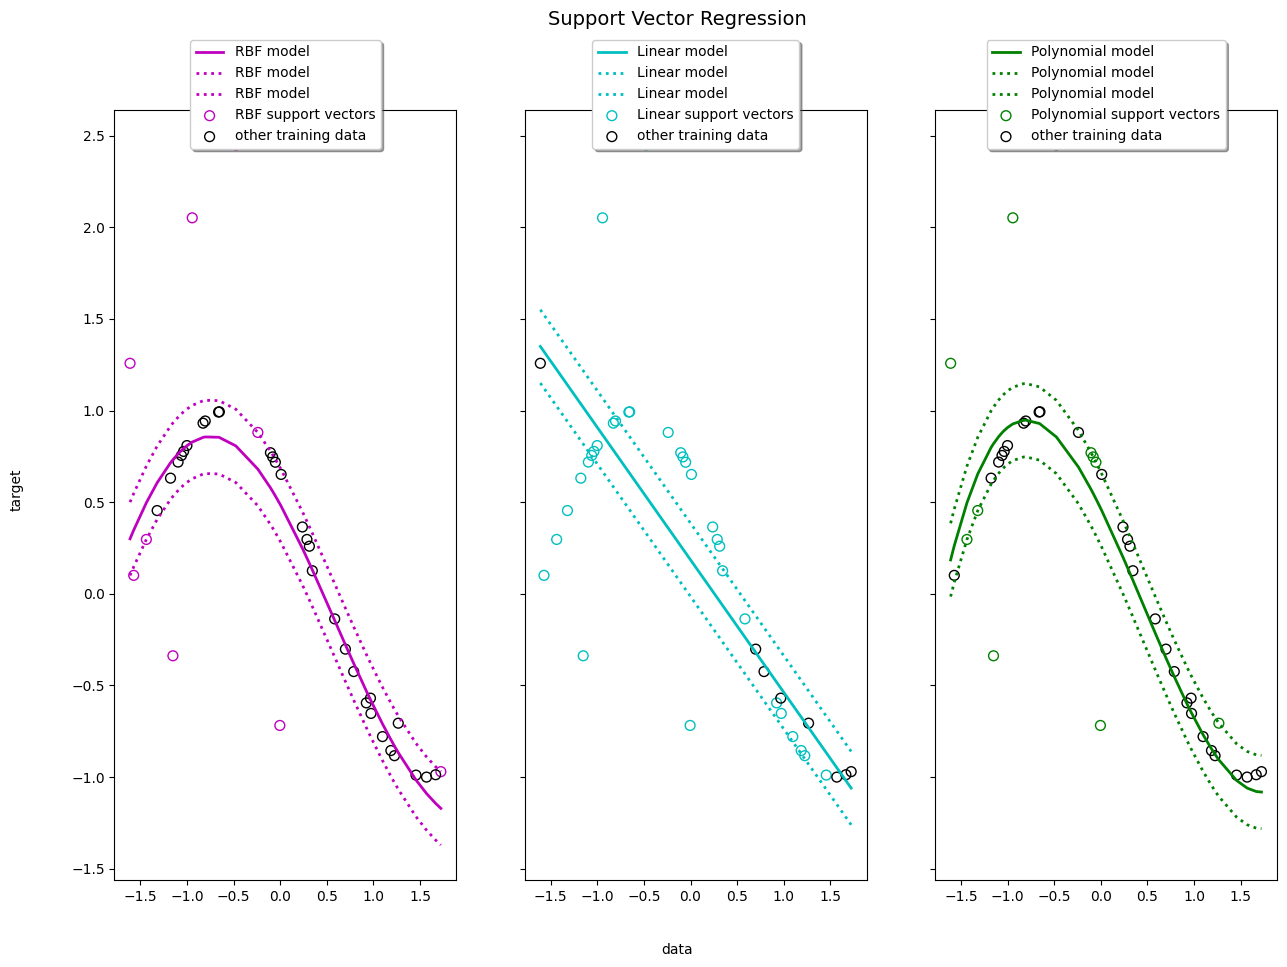

In [2]:
# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X)-epsilon,
        color=model_color[ix],
        lw=lw,
        linestyle=":",
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X)+epsilon,
        color=model_color[ix],
        lw=lw,
        linestyle=":",
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [3]:
from sklearn.metrics import explained_variance_score

y_rbf=svr_rbf.predict(X)
y_lin=svr_lin.predict(X)
y_poly=svr_poly.predict(X)

print(explained_variance_score(y,y_rbf))
print(explained_variance_score(y,y_lin))
print(explained_variance_score(y,y_poly))

0.7190088437579817
0.5491723965826487
0.7175283122296938
